In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read dataset
data=pd.read_csv('Wine_clust.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

# K Means Clustering

In [6]:
from sklearn.cluster import KMeans 

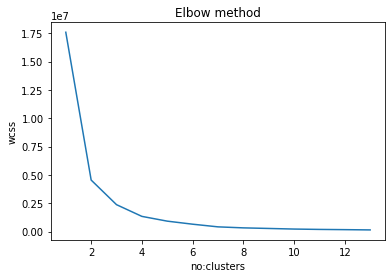

In [7]:
wcss=[]
for i in range(1,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss)  
plt.title('Elbow method')
plt.xlabel('no:clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [9]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2], dtype=int32)

In [10]:
#Silhouette Score
from sklearn.metrics import silhouette_score

In [11]:
silhouette_score(data,y_kmeans)

0.5572288268257268

# Agglomerative Hirarachial Clustering

In [12]:
#Agglomerative HC
import scipy.cluster.hierarchy as sch

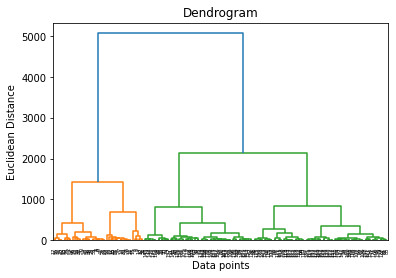

In [13]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data)

In [16]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
silhouette_score(data,y_hc)

0.6587292996216912

# DB Scan Clustering

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(data)
distances, indices = nbrs.kneighbors(data)

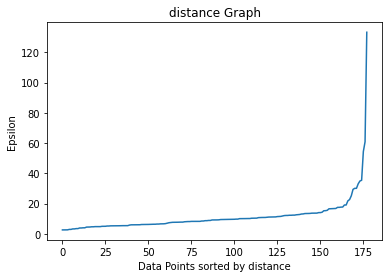

In [20]:
# Plotting distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [21]:
dbscan=DBSCAN(eps=40,min_samples=2).fit(data)
y_dbscan=dbscan.fit_predict(data)

In [22]:
len(set(y_dbscan))

5

In [23]:
y_dbscan

array([ 0,  0,  0,  1,  2,  1,  3,  3,  0,  0,  1,  3,  3,  0,  1,  3,  3,
        0, -1,  2,  2,  2,  0,  0,  2,  2,  0,  3,  2,  0,  3,  1,  0,  3,
        0,  2,  2,  0,  0,  2,  2,  0,  0,  2,  2,  0,  0,  0,  0,  3,  0,
        3,  0, -1,  0,  0,  0,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [24]:
silhouette_score(data,y_dbscan)

0.5609783563170826